Deoxyfluorination with Sulfonyl Fluorides Published in JACS https://doi.org/10.1021/jacs.8b01523
Yield Prediction using Random Forest and XGBoost
                                                                                      Gashaw M. Goshu
                                                                                      June, 2020

In [19]:
# import useful library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
data = pd.read_csv(r"C:\Users\Gashaw\Documents\R_input\descriptor_table.csv")
X_data = data.drop(['yield'], axis =1) # the 23 descriptors and their values
y_data = data['yield'] # Yield of the 640 rows is stored in the y_data variable


In [2]:
# get informatiom about the descriptors
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   alcohol_*C1_electrostatic_charge            640 non-null    float64
 1   alcohol_*C1_exposed_area                    640 non-null    float64
 2   alcohol_electronegativity                   640 non-null    float64
 3   alcohol_primary                             640 non-null    int64  
 4   alcohol_secondary                           640 non-null    int64  
 5   alcohol_tertiary                            640 non-null    int64  
 6   alcohol_cyclic                              640 non-null    int64  
 7   alcohol_4-membered_ring                     640 non-null    int64  
 8   alcohol_5-membered_ring                     640 non-null    int64  
 9   alcohol_6-membered_ring                     640 non-null    int64  
 10  alcohol_7-memb

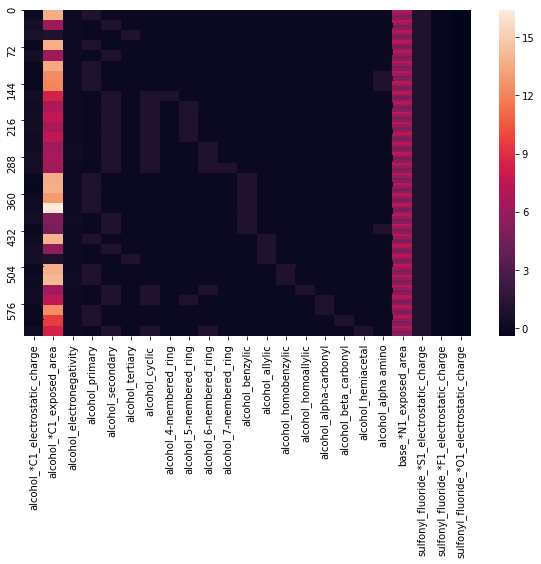

In [3]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X_data,yticklabels=72)

In [4]:

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data,test_size = 0.3, random_state=1)
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [5]:
# Data preprocessing using pipeline 
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', rf)])


In [6]:
# Model Training and prediction
pipe.fit(X_train,y_train) # training using 70% of the data
predicted_yield = pipe.predict(X_valid) # predicting yield for 30% of the data

In [7]:
# Model accuracy using mean absolute error
score = mean_absolute_error(y_valid, predicted_yield )
print('MAE:', score)

MAE: 5.911458333333333


In [8]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, predicted_yield )) 
print('rmse:', rmse)

rmse: 8.489304116062753


In [9]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield )
print('R^2:', R2)

R^2: 0.9080988304652095


Text(0.5, 1.0, 'Observed vs predicted yield of test set using Random Forest')

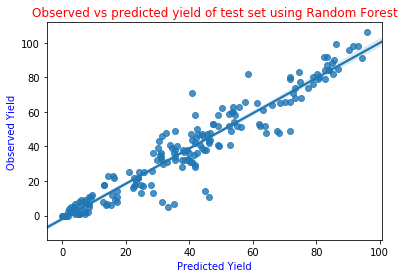

In [10]:
sn.regplot(x=predicted_yield , y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Observed vs predicted yield of test set using Random Forest", color='red')

In [11]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.0178 ± 0.0098,alcohol_cyclic
0.0057 ± 0.0033,alcohol_*C1_exposed_area
0.0021 ± 0.0015,alcohol_5-membered_ring
0.0018 ± 0.0015,alcohol_*C1_electrostatic_charge
0.0004 ± 0.0001,alcohol_primary
0 ± 0.0000,alcohol_secondary
0 ± 0.0000,alcohol_tertiary
0 ± 0.0000,alcohol_4-membered_ring
0 ± 0.0000,alcohol_7-membered_ring
0 ± 0.0000,alcohol_alpha amino


In [12]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=200, random_state=42)


In [13]:
# Data processing
pipe2 = Pipeline([
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', xgb_reg)])

In [14]:
pipe2.fit(X_train,y_train)
predicted_yield2 = pipe2.predict(X_valid)

In [15]:
# Model accuracy using mean absolute error
score = mean_absolute_error(y_valid, predicted_yield2)
print('MAE:', score)

MAE: 5.733065562012295


In [16]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, predicted_yield2))  
print('rmse2:', rmse2)

rmse2: 7.714153284427218


In [17]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield2)
print('R^2:', R2)

R^2: 0.9241154464741103


Text(0.5, 1.0, 'Observed vs predicted yield of test set using XGBoost')

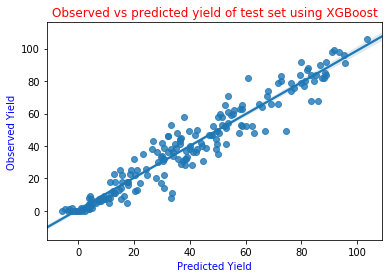

In [18]:
sn.regplot(x=predicted_yield2, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Observed vs predicted yield of test set using XGBoost", color='red')